# Multilayer Perceptron and Backpropagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
%matplotlib inline

## Question 1 

Consider the neural network considered in the first question of the theoretical component of the practical class, with number of units: 4,4,3,3.

![](https://drive.google.com/uc?id=1SHUgdosKp6AX8rRAACCZ5nb4kUXreI3g)

Assume all units, except the ones in the output layer, use the hyperbolic tangent activation function. 

Consider the following training example:

$\mathbf{x} =\begin{bmatrix} 1, 0, 1, 0 \end{bmatrix}^\intercal $,   $\mathbf{y} =\begin{bmatrix} 0\\ 1\\ 0 \end{bmatrix}$

❓ Using the squared error loss do a stochastic gradient descent update, initializing all connection weights and biases to 0.1 and a  learning rate η = 0.1:

1. Perform the forward pass
2. Compute the loss
3. Compute gradients with backpropagation
4. Update weights

In [2]:
inputs = np.array([[1, 0, 1, 0]]).T
labels = np.array([[0, 1, 0]]).T
# First is input size, last is output size.
units = [4, 4, 3, 3]

# Initialize weights with correct shapes 
w = [np.full((units[i+1], units[i]), 0.1) for i in range(0,len(units)-1)]
learning_rate = 0.1
bias = [np.full((units[i+1], 1), 0.1) for i in range(0,len(units)-1)]
print(inputs.shape, labels.shape, w[0].shape, w[1].shape, w[2].shape, bias[0].shape, bias[1].shape, bias[2].shape)

(4, 1) (3, 1) (4, 4) (3, 4) (3, 3) (4, 1) (3, 1) (3, 1)


In [3]:
# Forward Pass
layer = [[] for i in range(0,len(units))]
layer[0] = inputs
for i in range(0, len(units)-1):
    z = w[i] @ layer[i] + bias[i]
    if i != len(units)-2:
        layer[i+1] = np.tanh(z)
    else:
        layer[i+1] = z

In [4]:
# Loss
Loss = 1/2*np.sum((layer[-1] - labels)**2)
d_Loss = layer[-1] - labels
Loss, d_Loss.T

(0.37636378397755565, array([[ 0.16396106, -0.83603894,  0.16396106]]))

In [5]:
# Backpropagation
grad_z = d_Loss
for i in range(len(w)-1, -1, -1):
    grad_h = w[i].T @ grad_z
    w[i] = w[i] - learning_rate * (grad_z @ layer[i].T) 
    bias[i] = bias[i] - learning_rate * (grad_z) 
    grad_z = grad_h * ((1 - layer[i]**2))

❓ Let's say we were using the same training example but with the following changes:
- The output units have a softmax activation function
- The error function is cross-entropy

Keeping the same initializations and learning rate, adjust your computations to the new changes.

**Solution:** We need only to change:  
- the output, *i.e.*, $\hat{y} = softmax(z_3)$ instead of $\hat{y} = z_3$
- the loss computation to $L = -y.log(\hat{y})$
- the gradient of the loss with respect to $z_3$: $\frac{dL}{dz_3}$

All other steps remain unchanged.

In [6]:
inputs = np.array([[1, 0, 1, 0]]).T
labels = np.array([[0, 1, 0]]).T
# First is input size, last is output size.
units = [4, 4, 3, 3]

# Initialize weights with correct shapes 
w = [np.full((units[i+1], units[i]), 0.1) for i in range(0,len(units)-1)]
learning_rate = 0.1
bias = [np.full((units[i+1], 1), 0.1) for i in range(0,len(units)-1)]


# Forward Pass
layer = [[] for i in range(0,len(units))]
layer[0] = inputs
for i in range(0, len(units)-1):
    z = w[i] @ layer[i] + bias[i]
    if i != len(units)-2:
        layer[i+1] = np.tanh(z)
    else:
        layer[i+1] = np.exp(z)/np.sum(np.exp(z))
        
        
Loss = -labels.T @ np.log(layer[-1])
grad_z = layer[-1] - labels
for i in range(len(w)-1, -1, -1):
    grad_h = w[i].T @ grad_z
    w[i] = w[i] - learning_rate * (grad_z @ layer[i].T) 
    bias[i] = bias[i] - learning_rate * (grad_z) 
    grad_z = grad_h * ((1 - layer[i]**2))

❓ Complete functions `forward`, `compute_loss`, `backpropagation` and `update_weights` generalized to perform the same computations as before, but for any MLP architecture.

In [7]:
'''
x: single observation of shape (n,)
weights: list of weight matrices [W1, W2, ...]
biases: list of biases matrices [b1, b2, ...]

y: final output
hiddens: list of computed hidden layers [h1, h2, ...]
'''
def forward(x, weights, biases):
    num_layers = len(weights)
    g = np.tanh
    hiddens = []
    for i in range(num_layers):
        h = x if i == 0 else hiddens[i-1]
        z = weights[i] @ h + biases[i]
        # compute hidden layer
        if i != num_layers-1:
            hiddens.append(g(z))
        
        #compute output
        else:
            #output = np.exp(z)/np.sum(np.exp(z))
            output = z

    return output, hiddens

def compute_loss(output, y):
    loss = -y @ np.log(output)
    return loss   

#(4,) (3) (3) (4 ou 3) (4,4 ou 3,4 ou 3,3)
def backward(x, y, output, hiddens, weights):
    num_layers = len(weights)
    g = np.tanh
    z = output

    probs = np.exp(output) / np.sum(np.exp(output))
    grad_z = probs - y  
    
    grad_weights = []
    grad_biases = []
    
    # Backpropagate gradient computations 
    for i in range(num_layers-1, -1, -1):
        h = x if i == 0 else hiddens[i-1]
        # Gradient of hidden parameters.
        grad_weights.append(np.expand_dims(grad_z,axis=1) @ np.expand_dims(h,axis=1).T)
        grad_biases.append(grad_z)
        grad_h = weights[i].T @ grad_z
        grad_z = grad_h * (1 - h**2)
    # Making gradient vectors have the correct order
    grad_weights.reverse()
    grad_biases.reverse()
    return grad_weights, grad_biases

## Question 2

Now we will use the MLP on real data to classify handwritten digits.

Data is loaded, split into train and test sets and target is one-hot encoded below:

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

data = load_digits()

inputs = data.data  
labels = data.target  
n, p = np.shape(inputs)
n_classes = len(np.unique(labels))


X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# Encode labels as one-hot vectors.
one_hot = np.zeros((np.size(y_train, 0), n_classes))
for i in range(np.size(y_train, 0)):
    one_hot[i, y_train[i]] = 1
y_train_ohe = one_hot
one_hot = np.zeros((np.size(y_test, 0), n_classes))
for i in range(np.size(y_test, 0)):
    one_hot[i, y_test[i]] = 1
y_test_ohe = one_hot

❓ Complete function `MLP_train_epoch` using your previously defined functions to compute one epoch of training using SGD:

In [9]:
'''
Outputs:
    - weights: list of updated weights
    - biases: list of updated 
    - loss: scalar of total loss (sum for all observations)

'''

def MLP_train_epoch(inputs, labels, weights, biases):
    num_layers = len(weights)
    total_loss = 0
    
    # For each observation and target
    for x, y in zip(inputs, labels):
        # Compute forward pass
        output, hiddens = forward(x, weights, biases)
        # Compute Loss and update total loss
        compute_loss(output, y)
        # Compute backpropagation
        grad_weights, grad_biases = backward(x, y, output, hiddens, weights)
        # Update weights
        for i in range(num_layers):
            weights[i] -= learning_rate * grad_weights[i]
            biases[i] -= learning_rate * grad_biases[i]
         
    return weights, biases, total_loss

Let's use a MLP with a single hidden layer of 50 units and a learning rate of $0.001$. 

❓ Run 100 epochs of your MLP. Save the loss at each epoch in a list and plot the loss evolution after training.

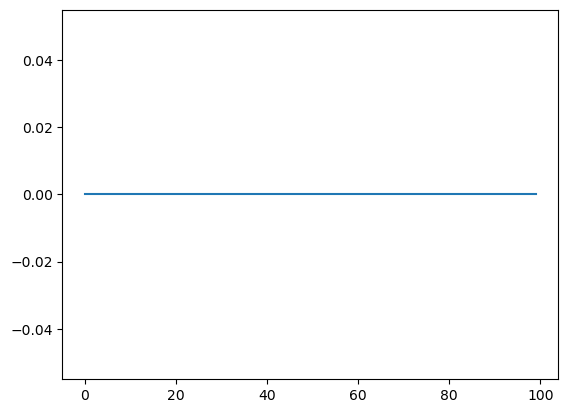

In [10]:
# Initialize weights
units = [p, 50, n_classes]
w = [np.full((units[i+1], units[i]), 0.1) for i in range(0,len(units)-1)]
b = [np.full((units[i+1]), 0.1) for i in range(0,len(units)-1)]
#np.random.randn

# Empty loss list
loss = []
# Learning rate.
learning_rate = 0.001    
# Run epochs and append loss to list
epochs = 100
for i in range(epochs):
    w, b, total_loss = MLP_train_epoch(X_train, y_train_ohe, w, b)
    loss.append(total_loss)
# Plot loss evolution
plt.plot(loss)

❓ Complete function `MLP_predict` to get array of predictions from your trained MLP:

In [ ]:
def MLP_predict(inputs, weights, biases):
    predicted_labels = []
    for x in inputs:
        # Compute forward pass and get the class with the highest probability
        pass
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

❓ Compute the accuracy on the train and test sets.

We can compare our results with Sklearn's implementation of the MLP. Compare their accuracies:

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50),
                    activation='tanh',
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    nesterovs_momentum=False,
                    random_state=1,
                    max_iter=1000)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))